<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M-É-T-O-D-O   D-E   A-C-I-E-R-T-O   Y   E-R-R-O-R

El método de Montecarlo consiste en utilizar números aleatorios para aproximar soluciones de problemas matemáticos, como la integración numérica, en este caso usaremos el método de acierto y error para calcular la integral

$$\int_{0}^{1} \sqrt{arctan(x)} \ dx$$

* Primero calculamos la integral con ayuda de una calculadora para ver cual es su valor real y poder comparar los metodos que realizaremos, asi

$$\int_{0}^{1} \sqrt{arctan(x) } \ dx\approx 0.629823$$

Ahora aplicamos el método:

1. Tendremos que
$$ I = \int_{0}^{1} \sqrt{arctan(x)} $$

2. Generamos $N$ números aleatorios de $x_i$ uniformemente distribuidos en el intervalo $[0,1]$

3. Evaluamos la función $\sqrt{arctan(x)}$ en cada uno de los puntos generados asi:

$$ f(x_i)= \sqrt{arctan(x_i)}$$

4. Podemos decir que la integral es

$$ I \approx c(b-a) \frac{n_\alpha}{n}$$

donde $n_\alpha$ es el número dde puntos bajo o sobre la curva.

5. Finalmente la probabilidad de acertar en la región bajo la curva es:

$$p = \frac{I}{c(b-a)}$$



In [80]:
# Importamos las paqueterias necesarias
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [81]:
# Definimos nuestra función g(x)
def g(x):
    return np.sqrt(np.arctan(x))

In [82]:
# Función para graficar los puntos y la curva
def grafica(x_puntos, y_puntos, abajo_curva):
    x = np.linspace(0, 1, 1000)
    y = g(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='g(x) = sqrt(arctan(x))', color='blue')

    plt.scatter(x_puntos[abajo_curva], y_puntos[abajo_curva], color='blue', s=20, label='Puntos debajo de la curva')
    plt.scatter(x_puntos[~abajo_curva], y_puntos[~abajo_curva], color='red', s=20, label='Puntos encima de la curva')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Método de Monte Carlo de Acierto y Error')
    plt.legend()
    plt.show()

In [83]:
# Función para calcular y graficar la convergencia de la probabilidad
def probabilidad(abajo_curva, num_puntos):
    prob_acierto = np.cumsum(abajo_curva) / np.arange(1, num_puntos + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(prob_acierto, label='Probabilidad de acierto')
    plt.axhline(y=np.mean(abajo_curva), color='red', linestyle='--', label='Valor esperado')

    plt.xlabel('Número de puntos')
    plt.ylabel('Probabilidad acumulada')
    plt.title('Convergencia de la probabilidad de acierto')
    plt.legend()
    plt.show()

In [91]:
# Función principal que calcula la integral usando el método de Monte Carlo
def monte_carlo_aci_error(a, b, num_puntos):
    # Generamos nuestros puntos aleatorios (x_i, y_i)
    x_puntos = np.random.uniform(a, b, num_puntos)
    y_max = g(b)  # Suponemos que g(x) está acotada
    y_puntos = np.random.uniform(0, y_max, num_puntos)

    # Contamos los puntos que caen debajo de la curva g(x)
    abajo_curva = y_puntos < g(x_puntos)
    aux_num = np.sum(abajo_curva)

    # Estimamos el área bajo la curva
    area_curv = (b - a) * y_max
    integral_est1 = (aux_num / num_puntos) * area_curv

    # Llamamos a la función de graficar
    grafica(x_puntos, y_puntos, abajo_curva)

    # Lamamos la funcion de probabilidad
    probabilidad(abajo_curva, num_puntos)

    return integral_est1

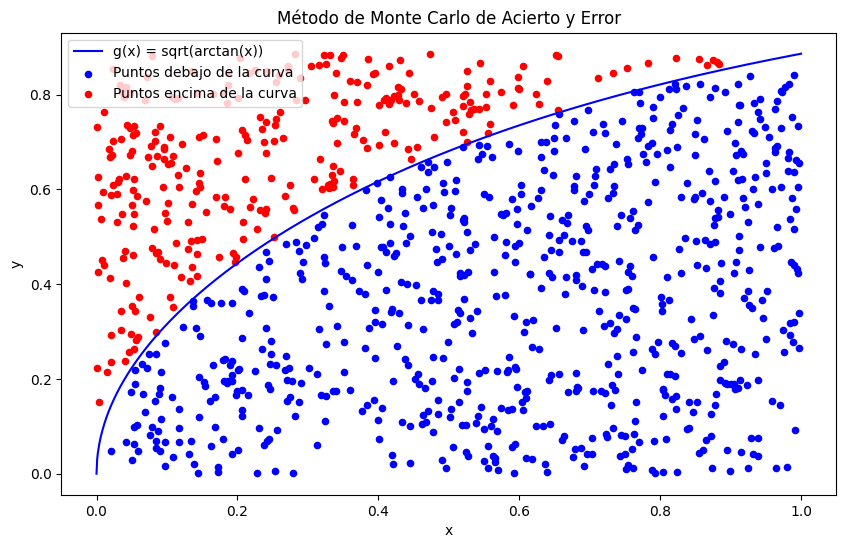

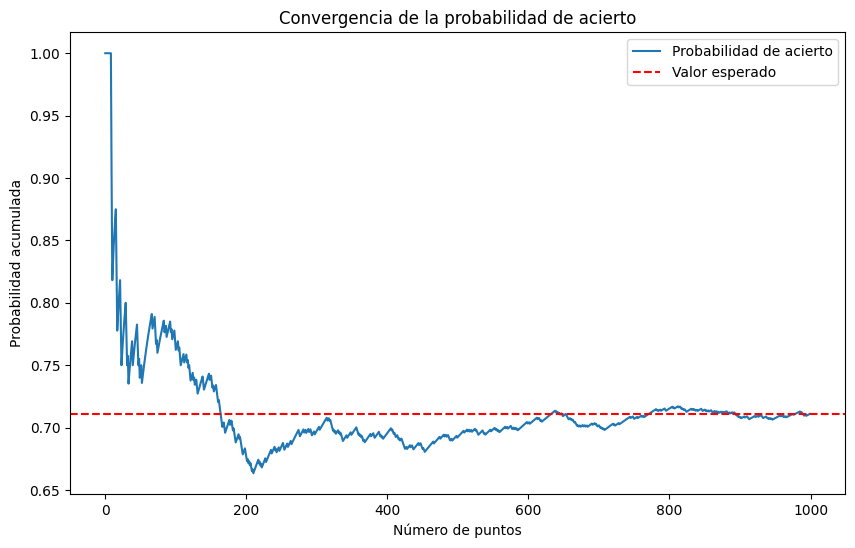

Estimación de la integral: 0.6301073439969108


In [92]:
# Calculamos la estimación de la integral
integral = monte_carlo_aci_error(0, 1, 1000)
print(f"Estimación de la integral: {integral}")

Ahora veamos que pasa con el método de media muestral

M-É-T-O-D-O   D-E    M-É-D-I-A    M-U-E-S-T-R-A-L




In [93]:
# Retomamos nuestra función g(x) definida al principio
# Implementamos el método de Monte Carlo
def monte_carlo_med(a, b, n):
    # Generar una secuencia {Ui}
    U = np.random.uniform(a,b,n)

    # Calculamos Xi = a + Ui * (b - a)
    X = a + U * (b - a)

    # Calculamos g(X)
    g_X = g(X)

    # Calculamos la media muestral θ1
    theta_1 = (b - a) * np.mean(g_X)

    return theta_1

In [94]:
# Calcular la estimación de la integral
integral_est2 = monte_carlo_med(0,1,100)
print(f"Estimación de la integral: {integral_est2}")

Estimación de la integral: 0.6369243752764652


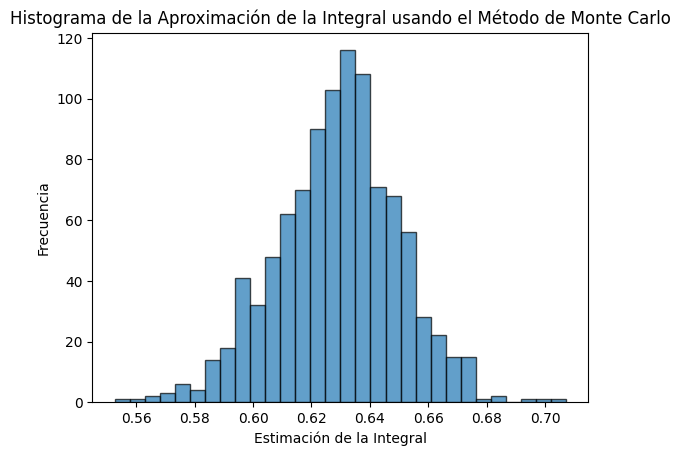

In [95]:
aux = 1000  # Número de estimaciones para el histograma

# Generar múltiples estimaciones de la integral
integral_est2 = [monte_carlo_med(0, 1, 100) for _ in range(aux)]

# Graficar el histograma de las estimaciones de la integral
plt.hist(integral_est2, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de la Aproximación de la Integral usando el Método de Monte Carlo')
plt.xlabel('Estimación de la Integral')
plt.ylabel('Frecuencia')
plt.show()